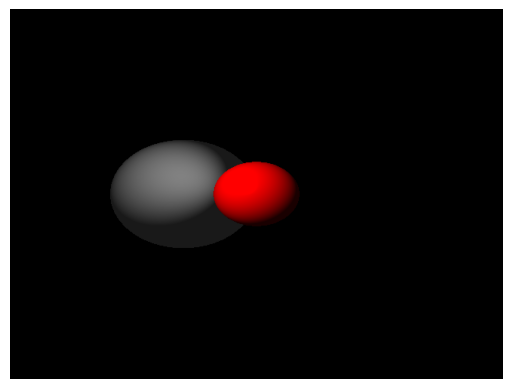

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sphere parameters
sphere_centers = [np.array([1, 0, 6]), np.array([0, 0, 5])]
sphere_radii = [1, 0.5]
sphere_colors = [(1, 1, 1), (1, 0, 0)]

# Camera parameters
camera_pos = np.array([0, 0, 0])
camera_dir = np.array([0, 0, 1])
camera_up = np.array([0, 1, 0])
camera_right = np.cross(camera_dir, camera_up)
camera_fov = np.pi / 3

# Light parameters
light_pos = np.array([5, 5, -5])

# Image parameters
image_width = 640
image_height = 480

# Ray tracing functions
class Ray:
    def __init__(self, origin, direction):
        self.origin = origin
        self.direction = direction

def normalize(v):
    return v / np.linalg.norm(v)

def intersect_sphere(ray, center, radius):
    oc = ray.origin - center
    a = np.dot(ray.direction, ray.direction)
    b = 2.0 * np.dot(oc, ray.direction)
    c = np.dot(oc, oc) - radius**2
    discriminant = b**2 - 4*a*c
    if discriminant < 0:
        return None
    else:
        t1 = (-b - np.sqrt(discriminant)) / (2*a)
        t2 = (-b + np.sqrt(discriminant)) / (2*a)
        if t1 < 0 and t2 < 0:
            return None
        elif t1 < 0:
            return t2
        elif t2 < 0:
            return t1
        else:
            return min(t1, t2)

def reflect(v, n):
    return v - 2*np.dot(v, n)*n

def get_color(ray):
    t_min = float('inf')
    color = None
    for i, center in enumerate(sphere_centers):
        radius = sphere_radii[i]
        t = intersect_sphere(ray, center, radius)
        if t is not None and t < t_min:
            t_min = t
            color = sphere_colors[i]
    if color is None:
        return (0, 0, 0)
    else:
        point = ray.origin + ray.direction * t_min
        normal = normalize(point - center)
        view_dir = normalize(camera_pos - point)

        # Ambient light
        ambient = 0.1

        # Diffuse light
        light_dir = normalize(light_pos - point)
        diffuse = max(light_dir.dot(normal), 0)

        # Specular light
        specular = 0
        if diffuse > 0:
            reflect_dir = reflect(-light_dir, normal)
            specular_angle = max(view_dir.dot(reflect_dir), 0)
            specular = pow(specular_angle, 32)

        # Final color
        r, g, b = color
        r = min(int((ambient + diffuse + specular) * r * 255), 255)
        g = min(int((ambient + diffuse + specular) * g * 255), 255)
        b = min(int((ambient + diffuse + specular) * b * 255), 255)
        return (r, g, b)

# Main loop
image = np.zeros((image_height, image_width, 3), dtype=int)
pixel_width = 2*np.tan(camera_fov/2) / image_width
pixel_height = 2*np.tan(camera_fov/2) / image_height
for i in range(image_height):
    for j in range(image_width):
        x = (j - image_width / 2 + 0.5) * pixel_width
        y = -(i - image_height / 2 + 0.5) * pixel_height
        direction = normalize(camera_dir + x*camera_right + y*camera_up)
        ray = Ray(camera_pos, direction)
        color = get_color(ray)
        image[i, j] = color

# Display the image
plt.axis('off')
plt.imshow(image)
plt.show()
